# Introducción al Aprendizaje Supervisado - Clasificación (Parte I)

* KNN Classifier.
* Pre-procesamiento de los datos.
* Evaluación de un clasificador.
* FPR vs FNR tradeoff.

## 5to año - Ingeniería en Sistemas de Información

### Facultad Regional Villa María

* En los problemas de clasificación, la respuesta es **discreta** y **nominal**, en el sentido de que la misma es una categoria $C_i \in \{C_1, C_2, ..., C_n\}$, en donde no podemos asumir en ningún caso que $C_i > C_j$.

* Al no existir un ordenamiento entre las clases, no es posible calcular una distancia entre $y$ e $\hat{y}$. Entonces el error cuadrático medio no resulta una buena medida para entrenar o evaluar un clasificador.

* En cambio, otros conceptos vistos como bias-variance tradeoff y la interpretabilidad del modelo se mantienen también en la clasificación.

* También se aplica la noción de orden en los features $X_1,...,X_p$ al igual que en los métodos de regresión.

* Para medir la exactitud de un clasificador, la medida más común es el **error rate**, dado por
$$\frac{1}{n} \sum_{i=1}^n I(y_i \neq \hat{y}_i)$$
donde $I(y_i \neq \hat{y}_i) = 1$ si nuestra predicción difiere de la salida real, mientras que $I(y_i \neq \hat{y}_i) = 0$ si nuestro modelo predijo correctamente la salida para cada observación $i$.


Aclaración sobre la notación utilizada en las clases: el criterio utilizado para los nombres es el de mantener los nombres originales (en inglés) en la medida de lo posible. Esto se debe a que no existe amplia bibliografía en español sobre los temas aquí presentados, por lo tanto preferimos no traducir la mayoría de los términos, puesto que entendemos podría dificultar su posterior consulta en la bibliografía. Para aquellos términos que han sido traducidos, se aclara entre paréntesis su correspondiente término en inglés.

### Bayes classifier

El ideal contra el que se comparan todos los métodos de clasificación es el Bayes Classifier. El mismo asigna a cada observación su clase más probable (_most likely_), según los valores de los predictores. Dado un vector de test $X_0$, el clasificador le asignará la clase $j$ que maximiza

$$P(y=j \mid X=X_0)$$

donde, de acuerdo al Teorema de Bayes,

$$P(y \mid X) = \frac{P(y \cap X)}{P(X)} = \frac{P(y) P(X \mid y)}{P(X)}$$

donde, por su parte: $P(y)$ es la _prior probability_, $P(X \mid y)$ es la _likelihood_ (_posterior probability_) y $P(X)= \sum_{j=1}^C P(y = j)P(X \mid y = j)$ es la _marginal probability_.

De esta manera, si estamos haciendo una predicción binaria (para dos clases) nominales a las cuales llamamos 0 y 1, nuestro predictor seleccionará la clase $0$ si $P(y=0 \mid X=X_0) > 0.5$ y la clase $1$ si $P(y=1 \mid X=X_0) > 0.5$. En el caso de empate, es decir $P(y=0 \mid X=X_0) = P(y=1 \mid X=X_0) = 0.5$, suele optarse por elegir la clase aleatoriamente.

El Bayes classifier produce el menor error rate posible (_bayes error rate_), dado por

$$1 - \mathbb{E}(\max_j P(y=j \mid X))$$

donde $\mathbb{E}$ representa el valor esperado al considerar todos los posibles valores de $X$.

* Notar que Bayes error rate es mayor a 0 debido a factores como por ejemplo a la estocasticidad inherente en algún procedimiento de generación de los datos.

* Notar que Bayes error rate **equivale al error no reducible** visto anteriormente.

* **¿Qué problemas se les ocurre que tiene el Bayes estimator al pasarlo a la práctica?**

* En dataset reales no contamos con información de antemano sobre las distribuciones condicionales, por lo tanto resulta imposible implementar el clasificador de Bayes.
* No obstante, el mismo sirve como base teórica para varios clasificadores que intentarán estimar $\mathbb{P}(y \mid X)$, como por ejemplo kNN, visto a continuación.
* En particular, existen dos enfoques que toman los clasificadores. Aquellos que modelan la probabilidad conjunta, es decir $P(X \cap y)$ por medio de $P(X \mid y)$ multiplicado con la probabilidad a priori $P(y)$ para así computar la probabilidad posterior para cada clase por medio de
$$P(y \mid X) = \frac{P(y) P(X \mid y)}{P(X)}$$
se dice que utilizan un **generative approach**.

* En cambio, aquellos que modelan $P(y \mid X)$ directamente emplean lo que se conoce como **discriminative approach**. 

### k Nearest-Neighbors Classifier

* Un método muy simple y sin embargo muy efectivo para realizar clasificaciones es KNN: dadas $n$ observaciones en el conjunto de entrenamiento y un punto de test $X_0$, 
$$P(y = j \mid X = X_0) = \frac{1}{k} \sum_{i \in N_0} I(y_i = j)$$
donde $N_0$ es un neighbourhood ("vecindario") de $X_0$ representado por los $k$ puntos más cercanos a dicho punto $X_0$.

* kNN es un método **no paramétrico**, en el sentido de que no asume que las muestras proveen de una distribución probabilística parametrizada.

* kNN también puede utilizarse para regresiones, en donde el valor de salida es un promedio entre los valores de las $k$ observaciones más cercanas.

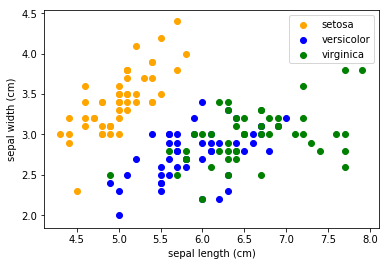

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import neighbors

iris = load_iris()
# tomamos los primeros dos features (el largo y el ancho del sépalo)
X = iris.data[:, :2]
y = iris.target

plot = plt.scatter(X[y==0, 0], X[y==0, 1], label=iris.target_names[0], color='orange')
plot = plt.scatter(X[y==1, 0], X[y==1, 1], label=iris.target_names[1], color='blue')
plot = plt.scatter(X[y==2, 0], X[y==2, 1], label=iris.target_names[2], color='green')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best', numpoints=1)

plt.show()

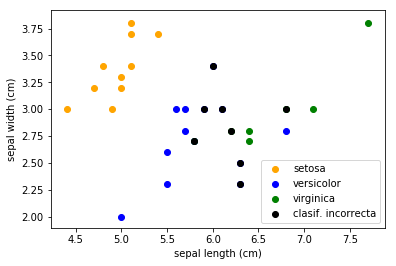

In [2]:
from sklearn.model_selection import train_test_split

# Instanciamos nuestro clasificador
clf = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')

# Dividimos el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

plot = plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plot = plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plot = plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plot = plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best', numpoints=1)

plt.show()

### Pre-procesamiento de datos

Algunos datasets no pueden recibir entrenamiento tal como están, por lo que necesitan un pre-procesamiento para poder adaptarse a los requerimientos del modelo. Vemos dos pre-procesamientos comunes:

#### Dummy variables para datasets con features no numéricos

* Por ejemplo, si tenemos que hacer una predicción y tenemos una variable categórica como por ejemplo "Género" que toma valores "Mujer" y "Varón", tal variable no puede ser utilizada de esa forma para hacer la predicción, puesto que los modelos emplean features numéricos.
* Una solución rápida consistiría en reemplazar los features asignando, por ejemplo, 0 cuando se trata de "Mujer" y 1 cuando se trata de "Varón", por ejemplo

|        | Género |
|--------|:------:|
| Ana    |    0   |
| José   |    1   |


* El problema de este enfoque es que asumimos arbitrariamente un orden en los features, por lo cual nuestro modelo estaría innecesariamente sesgado en su entrenamiento.
* El enfoque utilizado para estos casos consiste en crear un nuevo feature para cada valor categórico posible, asignando un 1 cuando el valor pertenece a la mencionada categoría y un 0 para todas las demás categorías.
* Las variables de esta forma reciben el nombre de "dummy variable".

|        | Mujer | Varón |
|--------|:-----:|:-----:|
| Ana    |   1   |   0   |
| José   |   0   |   1   |

#### Normalización de los datos

* En virtud de que todos los features contribuyan de forma equitativa, para algunos modelos se requiere que los datos estén normalizados de alguna forma, por ejemplo para que todos los valores caigan en el mismo rango fijo. La normalización se hace en cada feature. Informalmente, "para cada columna".
* Una normalización posible es **minmax normalization**, la cual transforma un feature de tal forma que todos sus valores caigan en $[0,1]$. Esta normalización es común en kNN para que la fórmula con la que se calcula la distancia no .
* Para lograr esto es suficiente hacer, para cada elemento $j$ del feature $X_i$

$$Z_{ij} = \frac{X_{ij} - min(X_{i})}{max(X_{i}) - min(X_{i})}$$

Ejemplo: dados los siguientes datos,

| Feature_1 |
|:---------:|
| 42        |
| 66        |
| 187       |
| 29        |

Normalizando...

| Feature_1 |
|:---------:|
| 0.08      |
| 0.23      |
| 1         |
| 0         |

* Otra normalización muy común es la **z-score standarization**, normaliza los valores con respecto a la desviación estándar, dejando los mismos con media 0. Analíticamente, $$Z_{ij} = \frac{X_{ij} - \bar{X}}{\sigma}$$ donde $\bar{X}$ es la media de la población y $\sigma$ es la desviación estándar.

* Cada valor $Z_{ij}$ normalizado representa la distancia entre el valor $X_{ij}$ y la media de la población, en $Z_{ij}$ desviaciones estándar como unidad.

Normalizando los datos iniciales del ejemplo el ejemplo anterior...

| Feature_1 |
|:---------:|
|-0.62      |
|-0.23      |
| 1.69      |
|-0.83      |

### Evaluando un clasificador

* La forma más simple de evaluar un clasificador es mediante el porcentaje de aciertos, es decir qué porcentaje de nuestras predicciones predijeron correctamente la clase de todos los puntos consultados.

In [3]:
# Vemos el porcentaje de aciertos en la clasificacion
print('Porcentaje de aciertos en la clasificación: ', clf.score(X_test,y_test))

Porcentaje de aciertos en la clasificación:  0.733333333333


* Esta métrica es una buena medida para saber rápidamente la tasa de aciertos en todo clasificador. Sin embargo no nos está dando detalles como, por ejemplo, que todas las Setosas fueron correctamente clasificadas. Para ello vamos a usar mejor información, que incluya las métricas comúnmente utilizadas para evaluar un clasificador.

#### Tipos de errores

* En la clasificación binaria (es decir cuando la cantidad de clases posibles a la que una variable puede pertenecer es de dos), al intentar hacer una predicción, existen dos tipos de errores de predicción a considerar.

* Por ejemplo, supongamos que la existencia de una enfermedad en un paciente. Como _hipótesis nula_ $h_0$ tomamos a "$h_0$: el paciente no posee la enfermedad", mientras que como _hipótesis alternativa_ tomamos "$h_1$: el paciente posee la enfermedad".

* Recordemos que $h_0$ es la hipótesis que establece normalmente "ausencia o inexistencia de relación entre dos fenómenos", mientras que $h_1$ representa "algún tipo de relación entre dos fenómenos".

* "_Inocente hasta que se demuestre lo contrario_". En testing de hipótesis, $h_0$ es la postura por defecto. Esto quiere decir que para rechazarla y por lo tanto validar una hipótesis alternativa debe demostrarse fehacientemente que $h_0$ es falsa más allá de toda duda razonable (normalmente representada por un intérvalo de confianza de 1% o 5%).

* El **error de tipo I** o **false positive** ocurre cuando se rechaza incorrectamente una $h_0$ verdadera. En nuestro ejemplo, esto sucede cuando incorrectamente diagnosticamos la enfermedad en el paciente.

* Por otra parte, el **error de tipo II** o **false negative**, ocurre cuando incorrectamente se retiene una $h_0$ falsa, siendo se daba $h_1$. En nuestro ejemplo esto sucede cuando detectamos incorrectamente que el paciente no registra la enfermedad.

* En el caso de que la predicción haya sido correcta, decimos que la misma arrojó un **true positive** o **true negative** (_positive_ representa la relación entre dos fenómenos).

* En nuestro caso, true positive representa la correcta existencia de la enfermedad mientras que false positive representa correcta la ausencia de la enfermedad.

* En nuestro ejemplo, si detectáramos varias enfermedades en el paciente y nos interesa saber $h_0$, true negative se referirá a los casos donde predecimos que el paciente no posee ninguna enfermedad y tal situación es la real; mientras que true positive se refiere a haber inferido correctamente que el paciente posee alguna enfermedad. Este enfoque se conoce como "one-vs-all".

#### Confusion Matrix

Una forma sencilla de evaluar el rendimiento de un algoritmo es por medio de una **confusion matrix** o **error matrix**, la cual contrasta las predicciones con los valores verdaderos, mostrando los errores TI y TII.

In [4]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_hat, labels=[0,1,2]))

[[10  0  0]
 [ 0  8  5]
 [ 0  3  4]]


Formateando:

|          |            |        | Predicted  |           |
|----------|------------|:------:|:----------:|:---------:|
|          |            | Setosa | Versicolor | Virginica |
|          | Setosa     |   10   |      0     |     0     |
|**Actual**| Versicolor |    0   |      8     |     5     |
|          | Virginica  |    0   |      3     |     4     |

* En el caso de la clasificación muticlase, para algunos algoritmos se usa la estrategia "one-vs-all" para referirse a los tipos de errores. Es decir que cada tipo de error es calculado para cada una de las clases, tomando un label de dicha clase como positivo ($y=1$) y un label de cualquier otra clase como negativo ($y=0$). 

* Esto se hace para poder extender el problema a partir de una clasificación binaria, pudiendo evaluar los errores TI y TII de la misma forma.

* Vemos ahora con mejor nivel de detalle aspectos como que las 10 flores Setosa utilizadas para el test fueron correctamente clasificadas, mientras que las flores Versicolor se confunden frecuentemente con las Virginica.


* Vamos a procesar todavía más esta información al calcular dos métricas adicionales que nos permitirán obtener más claridad.

* La primera es el **false positive rate (FPR)**, que representa el porcentaje de errores de TI en la clasificación, es decir

$$\frac{FP}{FP + TN}$$

* Por otra parte, el **false discovery rate (FDR)** representa el porcentaje de errores de TII en la clasificación, dado por

$$\frac{FP}{TP + FP}$$

* Uno de los indicadores principales es el **positive predictive value (PPV)** o **precision**, que representa el porcentaje de positivos correctamente inferidos como tal por cada positivo inferido. Está dado por

$$P(y=1 \mid \hat{y}=1) = \frac{TP}{TP + FP}$$

* Otro indicador muy importante es el **true positive rate (TPR)** o **recall**, que representa el porcentaje de positivos inferidos por cada positivo real, dado por

$$P(\hat{y}=1 \mid y=1)=\frac{TP}{TP + FN}$$

* La primera medida que vimos, el porcentaje de aciertos (**accuracy**) está dada por

$$\frac{TP + TN}{TP + FP + TN + FN}$$

* Un buen clasificador debería, en general (y dependiendo del problema que trata de resolver), intentar maximizar tanto precision como recall. Normalmente ambos representan intereses contrapuestos.

* Considerar como ejemplo la extracción de un tumor cerebral, donde un cirujano debe intentar maximizar la cantidad de células cancerígenas extraídas (recall) para evitar que se regenere el tumor, minimizando a su vez la cantidad de células no cancerígenas (precision) que podrían afectar las funciones cerebrales.

* Debido a que ambas métricas van de la mano, para evaluarlas conjuntamente se usa el F1 score, dado por la media armónica

$$F_1 = \frac{P^{-1}+R^{-1}}{2}^{-1} = \frac{2TP}{2TP + FP + FN}$$

Scikit-learn convenientemente hace este procesamiento por nosotros, como vemos a continuación:

In [5]:
print(metrics.classification_report(y_test, y_hat, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.73      0.62      0.67        13
  virginica       0.44      0.57      0.50         7

avg / total       0.75      0.73      0.74        30



Notar que support es la cantidad de instancias (true values) de cada una de las clases.

### False positive vs false negative tradeoff

* Como acabamos de ver, la contraposición de intereses en un clasificador se da porque existe una relación inversa entre los errores false positive (falsa alarma) y los errores false negative (detección perdida).
* La inclinación que querramos darle a este tradeoff depende del problema que estemos intentando resolver.
* Para aquellas tareas que se desempeñan en entornos con aversión al riesgo, como vemos en el ejemplo de la cirugía cerebral, debemos diseñar nuestro clasificador de tal forma que se minimicen los costos totales producidos por los errores de predicción.
* En la clasificación binaria, una de las opciones es incluir una **reject region**, es decir un umbral (_threshold_) de probabilidad donde el clasificador no tomará decisiones, dejando las mismas en manos de una persona, por ejemplo.

<img src="reject_region.png" width="40%">

Fuente: Figura 1.26 de Bishop 2006a

* Alternativamente, si queremos tomar esa decisión pero que nuestro clasificador sea conservador debido al posible costo de los errores, podemos usar el mismo umbral para definir hasta cuánto debe ser nuestro grado de seguridad para asegurar o rechazar $h_0$.
* En los clasificadores probabilísticos vistos aquí, el umbral es establecido al ver la probabilidad de predicción de as distintas clases, y alterando la clase elegida cuando la misma no supera el umbral.
* Por defecto, el umbral utilizado en los clasificadores binarios es 0.5, mientras que en los clasificadores multi-clase es el de la clase con mayor probabilidad.

Dadas dos clases 0 y 1, si queremos minimizar el costo de nuestros errores, utilizamos la _loss matrix_
$$
L =\begin{pmatrix}{}
  & \hat{y}=1 & \hat{y}=0 \\
y=1 & 0 & L_{FN} \\
y=0 & L_{FP} & 0 \end{pmatrix}
$$

donde $L_{FN}$ es el costo de un error FN mientras que $L_{FP}$ es el costo de un error FP. La posterior expected loss para ambas acciones está dada por

$$L(\hat{y}=0 \mid x)=L_{FN}P(y=1 \mid x)$$
$$L(\hat{y}=1 \mid x)=L_{FP}P(y=0 \mid x)$$

Por lo tanto, deberíamos escoger la clase 1 sii

$L(\hat{y}=0 \mid x) > L(\hat{y}=1 \mid x)$

(nota: "sii" equivale a "si y solo si" (iff, en inglés))

Si $L_{FN} = c L_{FP}$, entonces elegiremos $\hat{y}=1$ si

$$\frac{P(y=1 \mid x)}{P(y=0 \mid x)} > \frac{c}{1+c}$$

¿Qué significa esto? Significa que si un FN cuesta 2 veces lo que un FP (es decir que $c=2$), sólo elegiremos $\hat{y}=1$ si $P(y=1 \mid x) > 2/3$

#### Receiver operating characteristic (ROC) curve

* Una forma de evaluar cómo se desempeña un clasificador con distintos umbrales es empleando una curva ROC. La misma muestra cómo se comparan los distintos clasificadores en términos de TPR y FPR con respecto al clasificador aleatorio y al clasificador perfecto, mostrando el tradeoff entre true positives y false positives para las distintas instancias.

* Para comparar la calidad de las curvas ROC, una medida utilizada es comparar su área bajo la curva de cada clasificador. Otra medida es el **equal error rate (EER)**, definido como el valor donde se cumple que TPR=FNR. Dado que FNR = 1-TPR hallado en el punto donde interseca la curva ROC con la curva que va de la esq. superior izquierda a la esq. inferior derecha. Valores menores de EER son mejores.

* Notar que cualquier clasificador puede alcanzar el límite inferior izquierdo (TPR=FPR=0) al setear $\theta=1$ y por lo tanto clasificar todo como 0. Análogamente, setear $\theta=0$ hará que todos los resultados sean clasificados como 1, obteniendo (TPR=FPR=1).

* Trazar una línea (TPR=FPR) muestra cómo se desempeña el clasificador aleatorio, el cual es el piso mínimo que todo clasificador debe superar.

* La siguiente figura muestra una curva ROC para dos clasificadores A y B.

<img src="roc_curves.png" width="40%">

Fuente: www.cnblogs.com/cdeng/

#### Precision recall curves

* Al intentar predecir la ocurrencia de un evento muy raro (por ejemplo la predicción de una cara en una imagen), el número de negativos supera ampliamente al número de positivos. Esto hace que las curvas ROC no sean muy informativas, debido a que la mayoría de los umbrales arrojarán un número muy alto de falsos positivos, quedando sólo como interesante la parte más a la izquierda del gráfico.

* Para este tipo de casos, un criterio que suele tomarse es el de utilizar curvas de precision/recall. Las mismas también consideran distintos umbrales $\theta$, con la diferencia de que se invierte el sentido de la curva. Para sumarizar esta curva suele usarse el promedio de precision para los distintos umbrales.

<img src="precision_recall_curves.png" width="40%">

### Ejercicios

Para los siguientes ejercicios vamos a usar el Wisconsin Breast Cancer dataset, construído a partir de imágenes digitalizadas. Las mismas describen la información obtenida de cada imagen de célula mamaria biopsiada, especificando si el diagnóstico sobre la misma es que es benigna o maligna.

Se pide:

1. Declarar una variable random_state igual al número de alumno en la hoja de cálculo "Entregas TPs" en el Google Drive de la materia.
2. Implementar un clasificador kNN.
3. Aplicarle z-score standarization a los datos. Dividir en conjunto de train y test y entrenar el clasificador con el sub-conjunto de datos de entrenamiento, mostrando el correspondiente error de test. Utilizar el correspondiente random_state.
4. Considere el caso donde un incorrecto diagnóstico de cáncer cuando la célula es benigna tiene un costo de 5, mientras que una errónea omisión de una célula maligna tiene un costo de 20. Modificar las salidas del clasificador para que el mismo realice la mayor reducción posible del costo por errores de clasificación, e imprimir dichas salidas. Ayuda: una forma es utilizar el método predicted_proba() para obtener las probabilidades.
5. Considerando el punto anterior, ampliar el código para que seleccione automáticamente o mediante iteraciones la cantidad de vecinos que minimiza el costo. Especificar cuál es el costo mínimo obtenido tras dicha minimización.

Fecha de entrega: 17/05/2017.
Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código del notebook está permitida (por ejemplo para confeccionar gráficos).

In [6]:
# Código inicial

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

# TODO seguir aquí

In [7]:
# Información sobre el dataset
# help(load_breast_cancer)